<a href="https://colab.research.google.com/github/Nishant11769/Spark-Projects/blob/main/Decision%20Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [3]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data)
columns=iris.feature_names
Y=iris.target

In [4]:
train_x,test_x,train_y,test_y=train_test_split(df,Y,train_size=0.8)

In [5]:
print(train_x)

       0    1    2    3
136  6.3  3.4  5.6  2.4
143  6.8  3.2  5.9  2.3
86   6.7  3.1  4.7  1.5
67   5.8  2.7  4.1  1.0
7    5.0  3.4  1.5  0.2
..   ...  ...  ...  ...
147  6.5  3.0  5.2  2.0
103  6.3  2.9  5.6  1.8
38   4.4  3.0  1.3  0.2
114  5.8  2.8  5.1  2.4
118  7.7  2.6  6.9  2.3

[120 rows x 4 columns]


In [6]:
clf=DecisionTreeClassifier()
clf.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
pred_y=clf.predict(test_x)
print(pred_y)

[2 0 1 2 0 1 1 2 1 1 0 0 1 0 2 1 1 0 2 2 0 1 0 1 0 0 0 2 2 0]


In [8]:
test_y

array([2, 0, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1,
       0, 1, 0, 0, 0, 1, 2, 0])

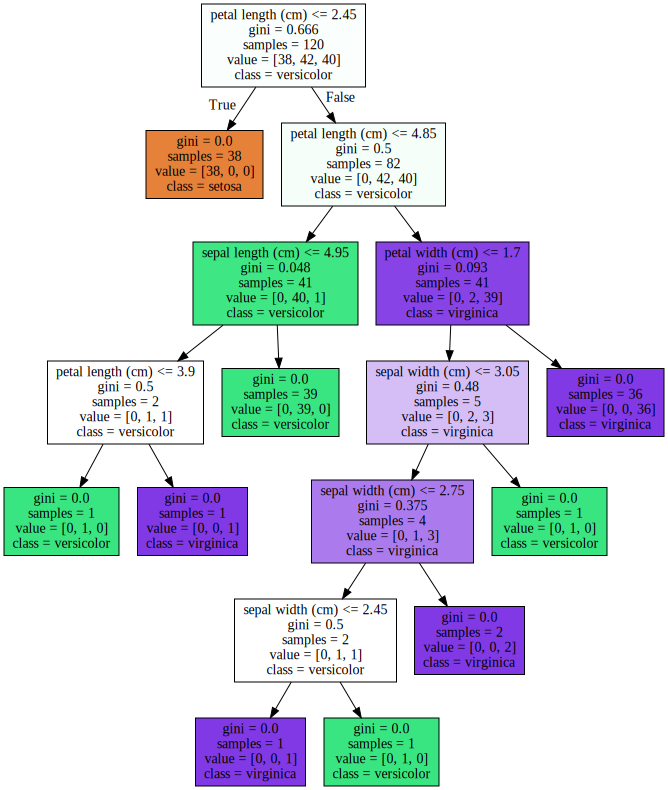

In [9]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

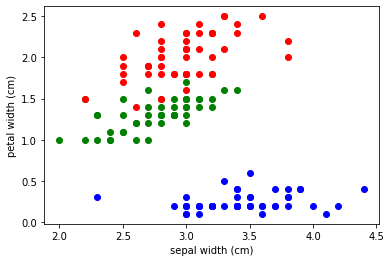

In [16]:
n1,n2=1,3
col={0:'b',1:'g',2:'r'}
s=[[[],[]],[[],[]],[[],[]]]
for i in range(150):
  a=df[n1][i]
  b=df[n2][i]
  ind=Y[i]
  s[ind][0].append(a)
  s[ind][1].append(b)
for i in range(3):
  plt.scatter(s[i][0],s[i][1],c=col[i])
plt.xlabel(columns[n1])
plt.ylabel(columns[n2])
plt.show()

In [11]:
print(pred_y==test_y)

[ True  True  True  True  True  True False  True  True  True  True  True
 False  True  True False  True  True  True  True  True  True  True  True
  True  True  True False  True  True]
